# Missing Data

- Values may be missed during data collection process.
    - This could be due to fauly sensors, human mistakes, data loss or other.

## Missing data Workflow
1. convert all missing values to null values.
2. analyse the amount and type of missingness in the data.
3. Appropriatleey delete or impute missing values.
4. Evaluate & compare the performance of the treated/imputed dataset.

## Types of missingness

- MCAR (Missing Completely at Random): No relationship with data.
- MAR (Missing at Random): Related to observed variables.
- MNAR (Missing Not at Random): Related to the missing value itself.

## Null value operations

- None (nothing) or np.nan (not a number)

In [ ]:
import numpy as np
np.nan or True


nan

In [6]:
None or True

True

- None does not support any operations
- nan returns nan for any operation. - this can be helpful as if you dont know if there are any missing values then you wont encounter an error if you try to perform an operation.

In [7]:
None / 3

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [8]:
np.nan / 3

nan

In [9]:
type(None), type(np.nan)

(NoneType, float)

In [14]:
None == None, np.nan == np.nan, np.nan is np.nan, np.isnan(np.nan)

(True, False, True, np.True_)

## Detecting missing values

when doing .info(), if the data type of a column is object and is expected to be something else, it may have a missing value.

sometimes the type is fine but the values might be 0 for some rows, this might make sense for some columns but not others. say if BMI is 0, this must be a missing value. We can then replace all 0 BMI values with nan.

In [37]:
import pandas as pd
import numpy as np
college = pd.read_csv('../data/College.csv')

print(college.info())

apps_unique = college['Apps'].unique()
np.sort(apps_unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    object 
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(15), object(2)
memory usage: 

array(['.', '100', '1002', '1003', '1004', '1005', '1006', '1011', '1013',
       '1016', '1025', '1038', '1040', '1046', '1047', '10477', '10634',
       '10705', '10706', '1082', '1083', '1092', '1093', '1096', '11023',
       '11054', '1107', '1109', '1110', '11115', '1121', '11220', '11223',
       '1127', '1130', '1132', '1133', '1151', '1154', '1160', '1163',
       '1164', '11651', '1166', '1170', '1179', '1183', '1190', '11901',
       '1196', '1202', '1205', '1208', '1209', '1216', '1217', '1220',
       '12229', '12289', '1231', '1232', '1239', '12394', '1243', '1244',
       '12445', '12512', '1256', '1257', '12586', '1262', '1267', '12749',
       '12809', '1283', '1286', '1305', '1307', '1310', '1320', '1321',
       '13218', '1334', '1339', '1340', '1351', '13528', '1358', '13594',
       '1368', '1373', '1377', '13789', '1380', '1381', '1386', '13865',
       '1399', '1401', '141', '1415', '1416', '1420', '1422', '14292',
       '1432', '1436', '14438', '1444', '14446', 

## Replacing missing values

while loading the data set we can replace the missing values with nan

In [38]:
college = pd.read_csv('../data/College.csv', na_values=['.'])

print(college.info())

apps_unique = college['Apps'].unique()
np.sort(apps_unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         776 non-null    float64
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(2), int64(15), object(1)
memory usage: 

array([   81.,   100.,   141.,   150.,   152.,   167.,   174.,   191.,
         193.,   202.,   212.,   213.,   222.,   232.,   233.,   235.,
         244.,   245.,   247.,   257.,   261.,   263.,   268.,   279.,
         280.,   281.,   283.,   285.,   291.,   292.,   313.,   314.,
         318.,   321.,   323.,   325.,   331.,   335.,   342.,   344.,
         346.,   348.,   353.,   355.,   360.,   361.,   367.,   368.,
         369.,   372.,   374.,   377.,   379.,   380.,   385.,   392.,
         404.,   417.,   420.,   427.,   434.,   437.,   440.,   441.,
         443.,   444.,   450.,   452.,   457.,   458.,   460.,   461.,
         462.,   464.,   465.,   467.,   469.,   472.,   477.,   478.,
         480.,   484.,   486.,   489.,   494.,   495.,   497.,   499.,
         500.,   502.,   504.,   510.,   511.,   513.,   516.,   519.,
         528.,   529.,   535.,   540.,   544.,   546.,   548.,   549.,
         553.,   555.,   560.,   563.,   571.,   572.,   576.,   578.,
      

## Analyse the amount and type of missingness in data

In [ ]:
import pandas as pd
college = pd.read_csv('../data/College.csv')

null = college.isnull()
null.head()

## true is missing value, false is not missing value

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## shows number of missing values in each column
null.sum()

Private        0
Apps           1
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [49]:
## shows percentage of missing values in each column
null.mean() * 100

Private        0.0000
Apps           0.1287
Accept         0.0000
Enroll         0.0000
Top10perc      0.0000
Top25perc      0.0000
F.Undergrad    0.0000
P.Undergrad    0.0000
Outstate       0.0000
Room.Board     0.0000
Books          0.0000
Personal       0.0000
PhD            0.0000
Terminal       0.0000
S.F.Ratio      0.0000
perc.alumni    0.0000
Expend         0.0000
Grad.Rate      0.0000
dtype: float64

<Axes: >

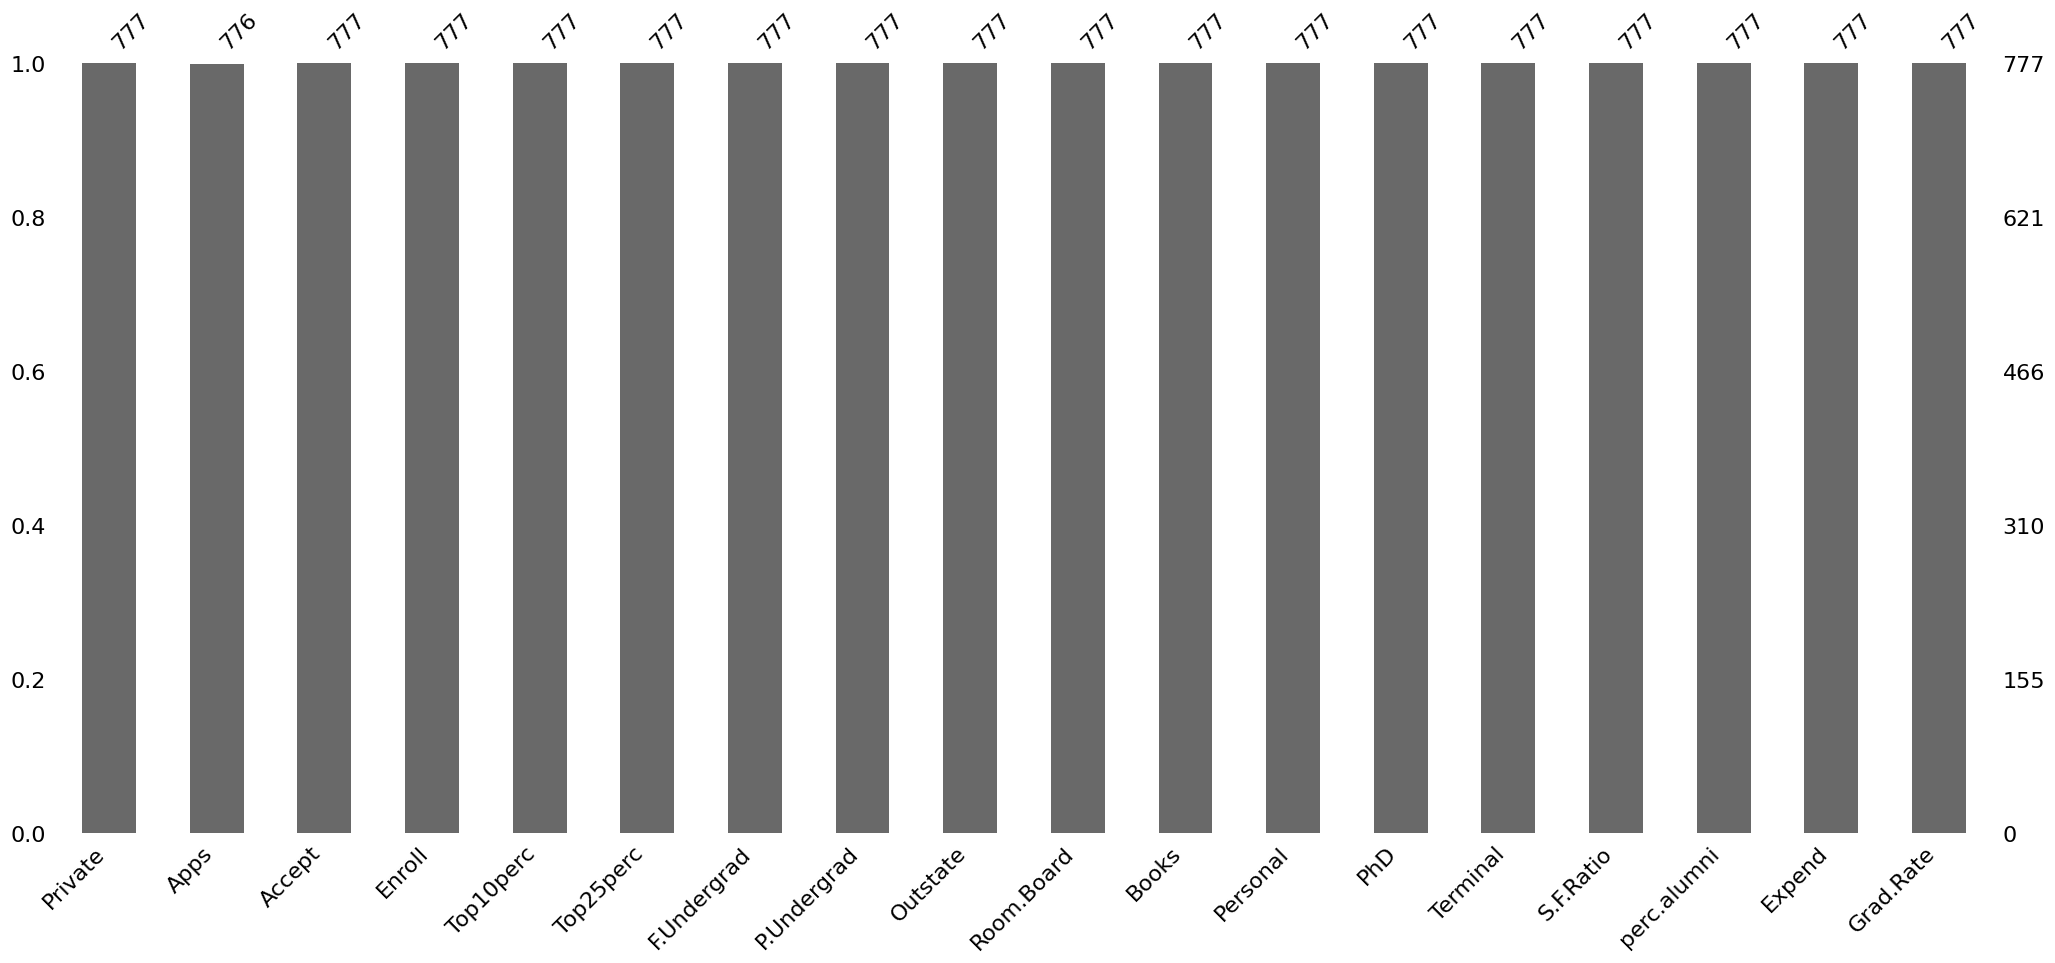

In [54]:
import missingno as msno 
## Visualize the missing values
msno.bar(college)

<Axes: >

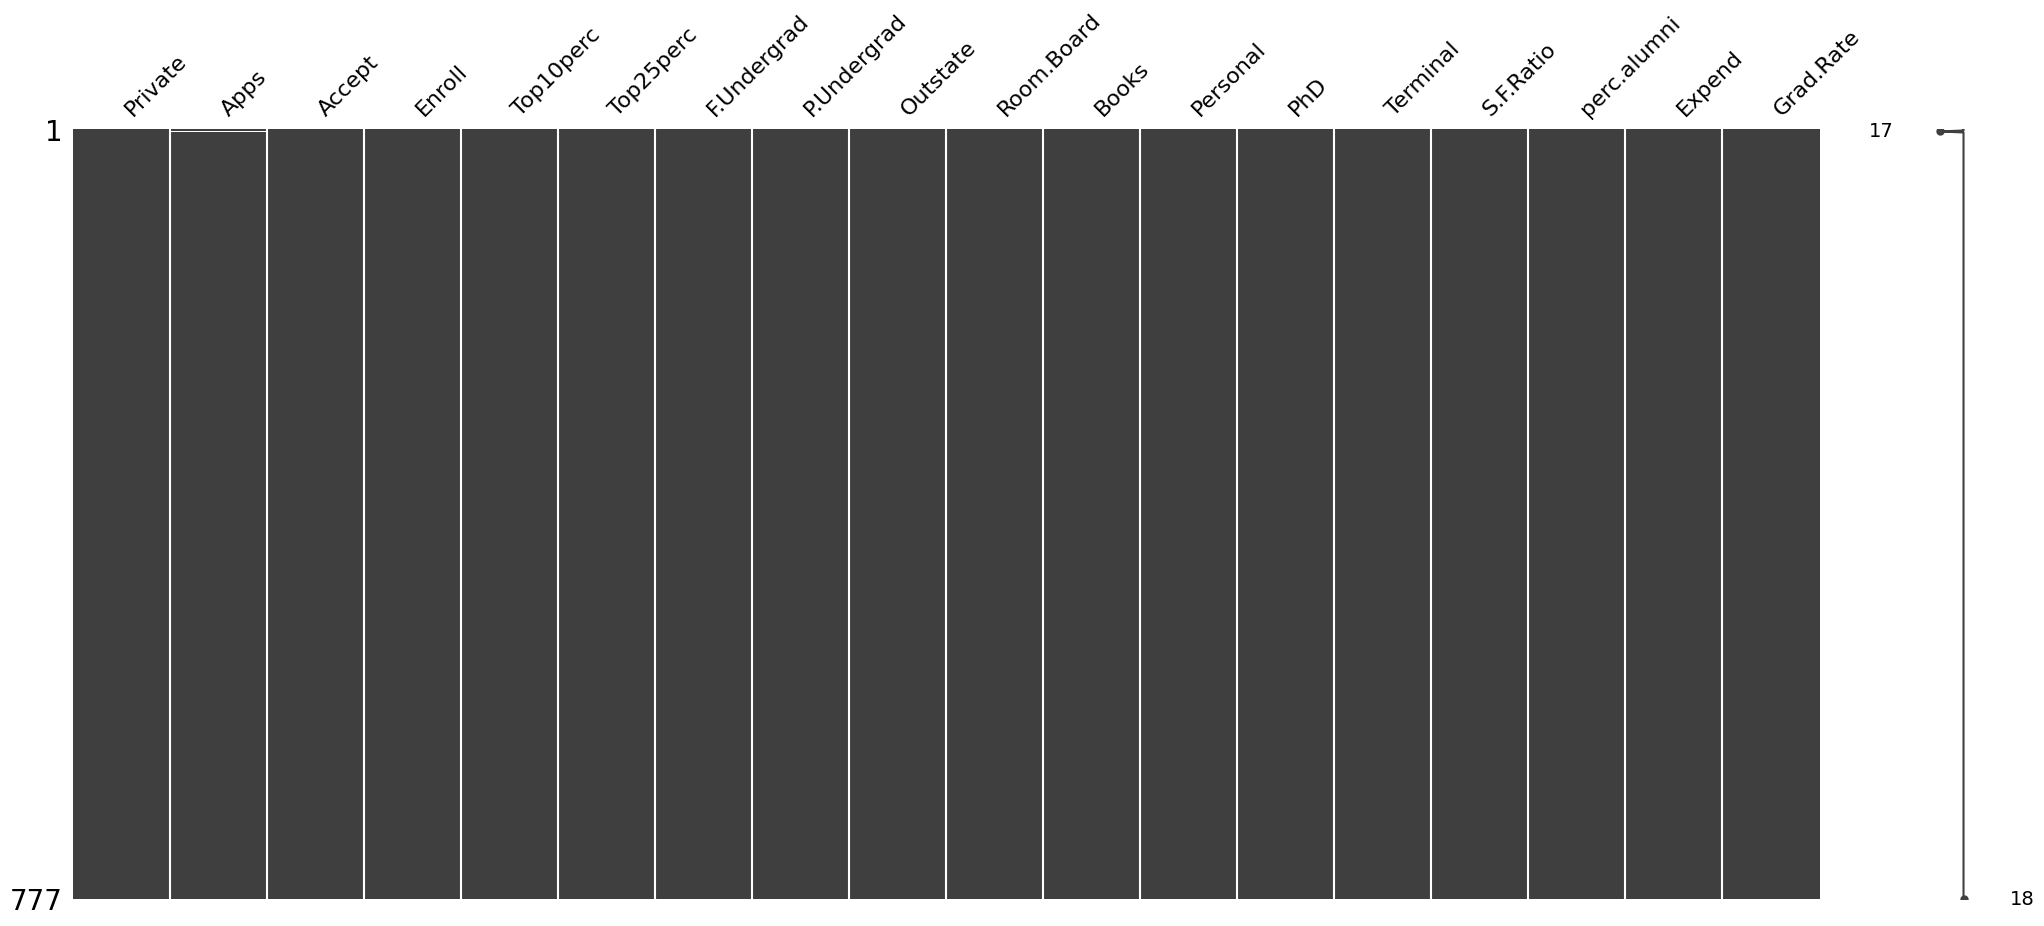

In [ ]:
## shows which rows are missing which columns
msno.matrix(college)

## Approaches to missing values


1. Drop the column: this is an extreme case and only should be done if most of the values are missing.
2. Imputation: fill in with some number. e.g we can fill in the mean value.
3. Extension to imputation: fill in with some number but add another column which states if the value of a column was missing or not.


- drop rows only when a small number of rows are missin data and removing them wont bias your dataset.
    - when to do: MCAR, <5% missing, each row has multiple columns missing, large data set.
- drop columns when its missing a lot of values or uninformative.
    - 

### Simple imputation techniques
1. Mean imputation: replace with mean value
1. Median imputation: replace with median value
1. Mode imputation: replace with most frequent value
1. Constant imputation: replace with a fixed constant, e.g 0


### Advanced imputation techniques
1. KNN imputation: replace with values of the nearest samples (use when there is a non-linear relationship)
1. Regression imputation: replace with predicted value using regression model (use when there is a strong linear relationship)
1. Stochastic Regression imputation: replace with predicted value using regression model and add random error to avoid bias.
1. Expectation-Maximization imputation: Iteratively estimates missing data and model parameters assuming underlying distributions. (Suitable for normally distributed data)
1. Multiple Imputation by Chained Equations MICE: performs multiple rounds of regression for each variable with missing data and creating multiple imputated datasets.
1. Iterative Imputer (MICE) → models each feature as a function of the others.


### Timeseries imputation
- Forward Fill (Last Observation Carried Forward): fill the missing value with last observed
- Backward Fill: fill the missing value with next observed
- Interpolation: take the mean value between the time range. (keeps the trend) We are estimating the missing values within the range of known data points.

## When to Avoid Imputation
- If missingness is not random, imputation may introduce bias.
- For very high proportions of missing data (>40%), consider excluding that feature or using domain expertise.